In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv('../data/rainfall in india 1901-2015.csv')
data = data.loc[data['SUBDIVISION'] == 'WEST UTTAR PRADESH']
del data[data.columns[0]]
data = data.loc[:, :'DEC']
data = data[data['YEAR'] > 2000]
data


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1227,2001,2.5,2.3,2.6,12.0,29.6,164.4,282.0,122.1,26.7,16.3,1.1,0.1
1228,2002,16.8,37.6,2.0,0.7,21.5,29.0,29.6,252.3,218.1,6.7,0.4,10.5
1229,2003,18.6,40.4,2.5,4.4,5.9,74.1,315.6,214.2,356.6,0.7,0.8,13.6
1230,2004,20.6,0.7,0.0,20.0,21.7,59.3,124.2,250.5,84.0,60.5,0.7,0.2
1231,2005,10.1,17.9,22.6,1.2,6.9,67.1,298.2,96.0,202.5,2.5,0.0,0.6
1232,2006,0.5,0.0,20.2,4.0,34.1,66.6,241.6,78.1,65.7,16.7,0.7,1.0
1233,2007,0.4,66.9,37.4,0.9,11.0,88.4,155.1,152.2,57.0,1.8,0.0,1.4
1234,2008,0.9,0.2,0.0,4.0,24.8,193.8,258.5,217.4,90.9,5.1,4.0,0.0
1235,2009,1.3,3.9,1.2,8.7,12.8,17.1,118.3,184.5,125.4,59.3,13.9,2.8
1236,2010,3.2,13.7,0.2,0.4,9.3,12.5,282.0,213.8,263.9,4.7,12.8,4.1


In [4]:
data.columns = data.columns[[0]].tolist() + list(range(1,13))
data = data.melt('YEAR')
data['Year-month'] = data[['YEAR','variable']].astype(str).agg('-'.join, 1)
data['Year-month'] = pd.to_datetime(data['Year-month'], format='%Y-%m')
data.sort_values(by='Year-month', inplace = True)
data = data.drop(columns=['YEAR', 'variable'])
data.index = data['Year-month']
del data['Year-month']
print(data)

            value
Year-month       
2001-01-01    2.5
2001-02-01    2.3
2001-03-01    2.6
2001-04-01   12.0
2001-05-01   29.6
...           ...
2015-08-01  143.5
2015-09-01   26.5
2015-10-01    6.9
2015-11-01    2.0
2015-12-01    3.0

[180 rows x 1 columns]


<Axes: xlabel='Year-month'>

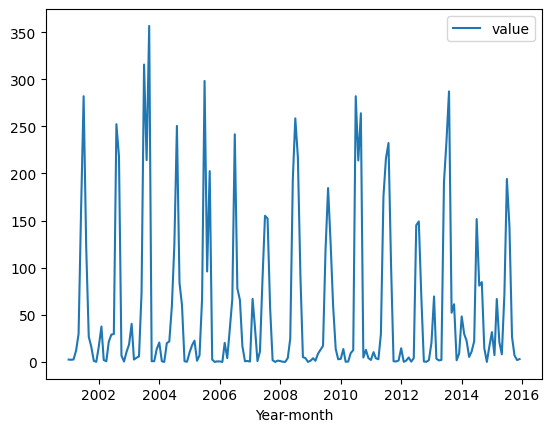

In [5]:
sns.lineplot(data)

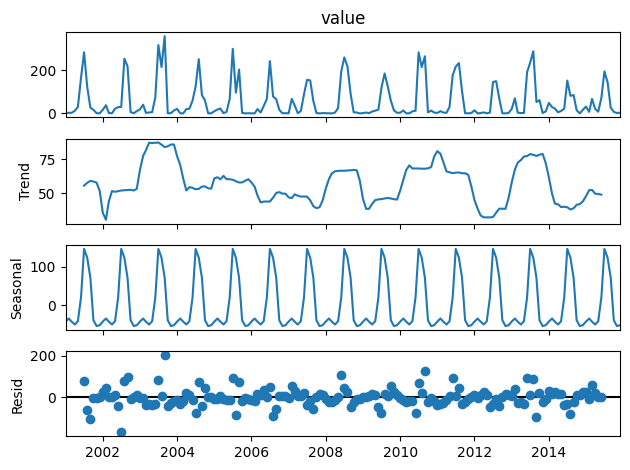

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data['value'],model='additive', period=12)
decompose.plot()
plt.show()

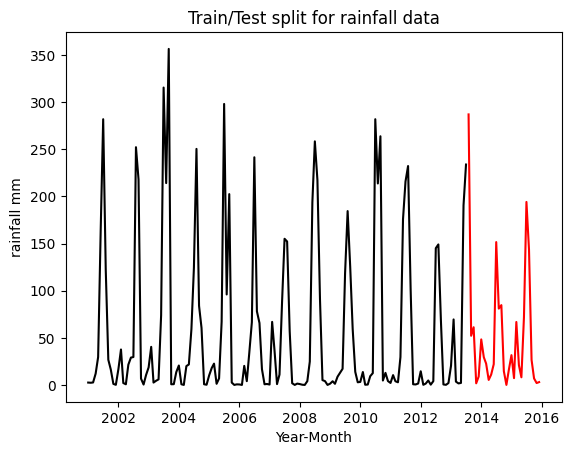

In [8]:
# split training and test
data['Date'] = data.index
train = data[data['Date'] < pd.to_datetime("2013-08", format='%Y-%m')]
del train['Date']
test = data[data['Date'] >= pd.to_datetime("2013-08", format='%Y-%m')]
del test['Date']

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for rainfall data")
plt.ylabel("rainfall mm")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [9]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1717.532, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1776.999, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1730.871, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1739.827, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1830.800, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1718.193, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1702.012, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1730.910, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1728.276, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1700.842, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1710.410, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1714.356, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1700.145, Time=0.35 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : 

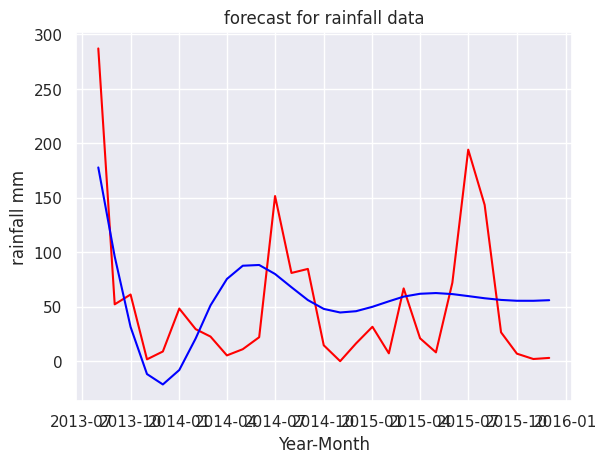

In [10]:
plt.clf()
plt.plot(test, color = "red")
plt.plot(forecast, color = "blue")
plt.title("forecast for rainfall data")
plt.ylabel("rainfall mm")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [69]:
forecast

,Prediction
Year-month,
1990-08-01,261.836260
1990-09-01,155.040906
1990-10-01,57.669126
1990-11-01,-4.657390
1990-12-01,-24.770364
...,...
2015-08-01,71.489543
2015-09-01,71.489543
2015-10-01,71.489543


Just work with West Uttar Pradesh data for POC
just googled top grains-producing regions idk

sources
kaggle dataset
https://www.kaggle.com/datasets/rajanand/rainfall-in-india/data?select=rainfall+in+india+1901-2015.csv
linear regression example
https://www.kaggle.com/code/ab22ecb0c36/rainfall-prediction-using-linear-regression
time series
https://builtin.com/data-science/time-series-python

https://stackoverflow.com/questions/63754844/converting-month-column-data-to-row
